In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  recall_score, f1_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [5]:
data = pd.read_csv("google.csv")
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
1,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
3,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
4,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [6]:
data.tail()

,Date,High,Low,Open,Close,Volume,Adj Close
4312,2021-10-05,2747.239990,2680.000000,2680.000000,2723.540039,1206300.0,2723.540039
4313,2021-10-06,2757.040039,2689.729980,2692.510010,2747.080078,988200.0,2747.080078
4314,2021-10-07,2803.089111,2771.260010,2777.260010,2783.709961,912500.0,2783.709961
4315,2021-10-08,2806.340088,2788.586914,2798.120117,2801.120117,946200.0,2801.120117
4316,2021-10-11,2815.272949,2776.129883,2796.000000,2776.949951,828700.0,2776.949951


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4317 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4317 non-null   object 
 1   High       4317 non-null   float64
 2   Low        4317 non-null   float64
 3   Open       4317 non-null   float64
 4   Close      4317 non-null   float64
 5   Volume     4317 non-null   float64
 6   Adj Close  4317 non-null   float64
dtypes: float64(6), object(1)
memory usage: 236.2+ KB


In [8]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,4317.000000,4317.000000,4317.000000,4317.000000,4.317000e+03,4317.000000
mean,639.682936,627.615621,633.603748,633.852357,6.523837e+06,633.852357
std,561.783142,552.069438,556.527532,557.255541,7.830526e+06,557.255541
min,50.680038,47.800831,49.409801,49.818268,7.922000e+03,49.818268
25%,247.507278,241.469910,244.832306,244.334183,1.593563e+06,244.334183
50%,401.988251,395.168823,399.004425,398.561096,3.851583e+06,398.561096
75%,933.440002,923.030029,929.059998,928.799988,8.268878e+06,928.799988
max,2936.409912,2912.290039,2918.989990,2916.840088,8.254163e+07,2916.840088


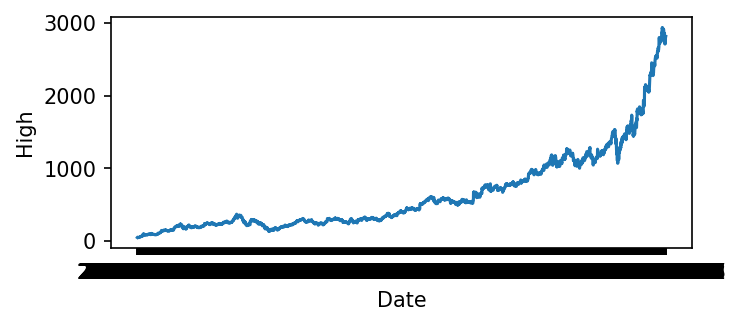

In [9]:
plt.figure(figsize=(5,2),dpi=150)

plt.plot(data.Date,data.High)
plt.xlabel("Date")
plt.ylabel("High")
plt.show()

In [ ]:
plt.figure(figsize=(5,2),dpi=150)

plt.plot(data.Date,data.High)
plt.xlabel("Date")
plt.ylabel("Low")
plt.show()

In [10]:
data.Date=pd.to_datetime(data.Date)

In [11]:
data.set_index(data.Date, drop=True,inplace=True)
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,,
2004-08-19,2004-08-19,51.835709,47.800831,49.813290,49.982655,44871361.0,49.982655
2004-08-20,2004-08-20,54.336334,50.062355,50.316402,53.952770,22942874.0,53.952770
2004-08-23,2004-08-23,56.528118,54.321388,55.168217,54.495735,18342897.0,54.495735
2004-08-24,2004-08-24,55.591629,51.591621,55.412300,52.239197,15319808.0,52.239197
2004-08-25,2004-08-25,53.798351,51.746044,52.284027,52.802086,9232276.0,52.802086


In [12]:
X=data.drop(data[["Open","Adj Close","Date"]],axis=1)

In [13]:
X

,High,Low,Close,Volume
Date,,,,
2004-08-19,51.835709,47.800831,49.982655,44871361.0
2004-08-20,54.336334,50.062355,53.952770,22942874.0
2004-08-23,56.528118,54.321388,54.495735,18342897.0
2004-08-24,55.591629,51.591621,52.239197,15319808.0
2004-08-25,53.798351,51.746044,52.802086,9232276.0
...,...,...,...,...
2021-10-05,2747.239990,2680.000000,2723.540039,1206300.0
2021-10-06,2757.040039,2689.729980,2747.080078,988200.0
2021-10-07,2803.089111,2771.260010,2783.709961,912500.0


In [14]:
y = data.Open
y

Date
2004-08-19      49.813290
2004-08-20      50.316402
2004-08-23      55.168217
2004-08-24      55.412300
2004-08-25      52.284027
                 ...     
2021-10-05    2680.000000
2021-10-06    2692.510010
2021-10-07    2777.260010
2021-10-08    2798.120117
2021-10-11    2796.000000
Name: Open, Length: 4317, dtype: float64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
pipe = Pipeline([('scaler', StandardScaler()),('Regressor',RandomForestRegressor())])


search_space = [{'Regressor': [Ridge()],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [Lasso(max_iter = 10000)],
                 'Regressor__alpha': np.logspace(-3, 1, 10)},
                {'Regressor': [KNeighborsRegressor()],
                 'Regressor__n_neighbors':[2,3,4,5,6]},
                {'Regressor': [RandomForestRegressor(random_state=0)],
                 'Regressor__n_estimators': [100, 200,300,400,500],
                 'Regressor__max_features': [3,4,5,6,7]},
                {'Regressor':[LogisticRegression(solver="liblinear")],
                 'Regressor__C':np.logspace(-3, 1, 10),
                 'Regressor__penalty':["l1","l2"]}]


clf = GridSearchCV(pipe, search_space, cv=5, verbose=0,scoring='neg_mean_squared_error')

best_model = clf.fit(X_train, y_train)

best_model.best_estimator_.get_params()['Regressor']

C:\Users\ezgie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
100 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
100 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ezgie\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ezgie\anaconda3\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\ezgie\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1146, in fit
    check_classification_targets(y)
  File "C:\User

Ridge(alpha=0.001)

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_trainStandard = scaler.transform(X_train)
X_testStandard = scaler.transform(X_test)


In [34]:
ridge = Ridge(alpha = 0.001)
ridge.fit(X_trainStandard, y_train)             
y_pred = ridge.predict(X_testStandard)           
print(pd.Series(ridge.coef_, index = X.columns)) 
print("MSE: " , mean_squared_error(y_test, y_pred)) 

High      476.964435
Low       408.288316
Close    -333.286731
Volume     -0.101645
dtype: float64
MSE:  22.295013815468227


In [38]:
y=test=pd.DataFrame(y_test)
y_test

Date
2019-09-24    1240.000000
2012-08-16     332.508667
2012-04-09     313.066559
2014-09-11     578.770996
2019-07-10    1131.219971
                 ...     
2010-02-09     268.762604
2019-11-04    1276.449951
2014-03-12     595.966187
2012-11-19     326.625732
2010-03-09     278.879700
Name: Open, Length: 864, dtype: float64

In [39]:
y_test=y_test.reset_index()
y_test

,Date,Open
0,2019-09-24,1240.000000
1,2012-08-16,332.508667
2,2012-04-09,313.066559
3,2014-09-11,578.770996
4,2019-07-10,1131.219971
...,...,...
859,2010-02-09,268.762604
860,2019-11-04,1276.449951
861,2014-03-12,595.966187
862,2012-11-19,326.625732


In [40]:
y_pred = pd.DataFrame(y_pred)
y_pred

,0
0,1235.330849
1,333.703615
2,314.034226
3,575.957777
4,1133.503380
...,...
859,268.871054
860,1281.082087
861,592.571146
862,328.357637


In [42]:
comp=y_test.merge(y_pred,left_index=True, right_index=True)
comp

,Date,Open,0
0,2019-09-24,1240.000000,1235.330849
1,2012-08-16,332.508667,333.703615
2,2012-04-09,313.066559,314.034226
3,2014-09-11,578.770996,575.957777
4,2019-07-10,1131.219971,1133.503380
...,...,...,...
859,2010-02-09,268.762604,268.871054
860,2019-11-04,1276.449951,1281.082087
861,2014-03-12,595.966187,592.571146
862,2012-11-19,326.625732,328.357637


In [43]:
comp.columns=["Date","Actual","Prediction"]
comp

,Date,Actual,Prediction
0,2019-09-24,1240.000000,1235.330849
1,2012-08-16,332.508667,333.703615
2,2012-04-09,313.066559,314.034226
3,2014-09-11,578.770996,575.957777
4,2019-07-10,1131.219971,1133.503380
...,...,...,...
859,2010-02-09,268.762604,268.871054
860,2019-11-04,1276.449951,1281.082087
861,2014-03-12,595.966187,592.571146
862,2012-11-19,326.625732,328.357637
